### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 5

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Ким Реачна
##### Группа:  НПИбд-01-20

## Москва 2023
***

### Вариант № 17

Для закрепленного за Вами варианта лабораторной работы:

1. Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов.  

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
target = 15
name = 'crx.data'

In [3]:
df = pd.read_csv("../data/crx.data",
                 delimiter=",", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
df.shape

(690, 16)

2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если столбец с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации с примерно равным количеством точек в положительном и отрицательном классах. Если один из классов является преобладающим (мажоритарным), то объедините все прочие классы в другой класс. 

In [5]:
df = df.replace('?', np.NaN)
print('Число записей = %d' % (df.shape[0]))
print('Число признаков = %d' % (df.shape[1]))
print('Число пропущенных значений:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Число записей = 690
Число признаков = 16
Число пропущенных значений:
	0: 12
	1: 12
	2: 0
	3: 6
	4: 6
	5: 9
	6: 9
	7: 0
	8: 0
	9: 0
	10: 0
	11: 0
	12: 0
	13: 13
	14: 0
	15: 0


In [6]:
df.dropna(subset=[target], inplace=True)

In [7]:
df[target].value_counts()

-    383
+    307
Name: 15, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df[target] = lb_make.fit_transform(df[target])
df[target].value_counts()

1    383
0    307
Name: 15, dtype: int64

3. Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Удалите из набора признаки с текстовыми (категориальными) значениями. Если в оставшихся числовых признаках имеются пропущенные значения, то замените их на средние значения для положительного и отрицательного классов.  

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,0
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,0
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,0
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,0


In [10]:
df.dtypes

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
15      int32
dtype: object

In [11]:
df = df[[1,2,7,13,14,15]]

In [12]:
df = df.astype(float)
df = df.select_dtypes(exclude=['object'])

In [13]:
df.fillna(df.groupby(target).transform('mean'), inplace=True)

In [14]:
print('Число пропущенных значений:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Число пропущенных значений:
	1: 0
	2: 0
	7: 0
	13: 0
	14: 0
	15: 0


4. Выполните стандартизацию признаков набора данных.  

In [15]:
X = df.drop([target],axis=1)
y = df[target]

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = pd.DataFrame(scaler.fit_transform(X))

5. Используя метод отбора признаков, указанный в индивидуальном задании, определите и оставьте в наборе данных два наиболее значимых признака, принимающих более 10 различных значений.

In [17]:
X = X[X.columns[X.nunique() > 10]].values

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
feature_importances = clf.feature_importances_
top_k_indices = np.argsort(feature_importances)[::-1][:2]
X_2 = X[:, top_k_indices]

6. Визуализируйте набора данных в виде точек на плоскости, отображая точки положительного и отрицательного классов разными цветами и разными маркерами. В качестве подписей осей используйте названия признаков, согласно описания набора данных. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

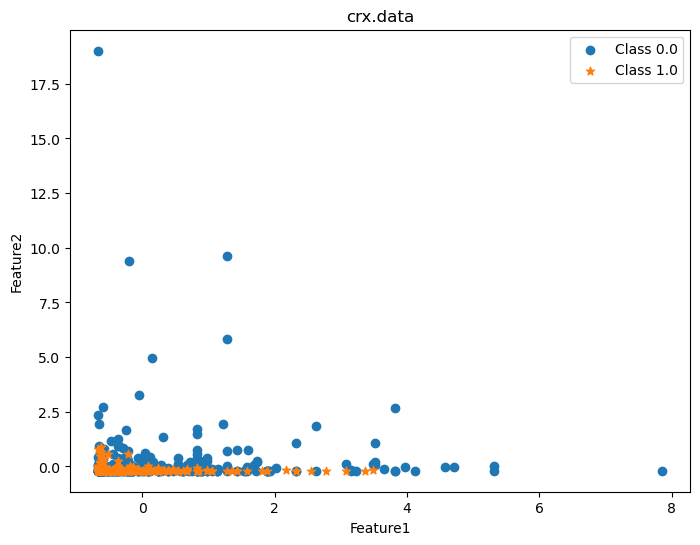

In [19]:
plt.figure(figsize=(8, 6))
cmap = plt.cm.get_cmap('viridis', len(np.unique(y)))
for class_label in np.unique(y):
    if class_label==0:
        plt.scatter(X_2[y == class_label, 0], X_2[y == class_label, 1], cmap=cmap, marker='o', label=f'Class {class_label}')
    else:
        plt.scatter(X_2[y == class_label, 0], X_2[y == class_label, 1], cmap=cmap, marker='*', label=f'Class {class_label}')
plt.title(name)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

7. Создайте модели классификации точек набора данных из двух признаков на базе классификаторов, указанных в индивидуальном задании. Используйте при обучении классификаторов разделение набора данных на обучающую и тестовую выборки в соотношении 70% на 30%. 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.3, random_state=666)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf1 = KNeighborsClassifier(n_neighbors=3)
clf1.fit(X_train, y_train)

clf2 = KNeighborsClassifier(n_neighbors=5)
clf2.fit(X_train, y_train);

clf3 = LinearDiscriminantAnalysis()
clf3.fit(X_train, y_train);

8. Визуализируйте для каждого из классификаторов границу принятия решения, подписывая оси и рисунок и создавая легенду для меток классов набора данных в соответствии с требованиями п. 6.  

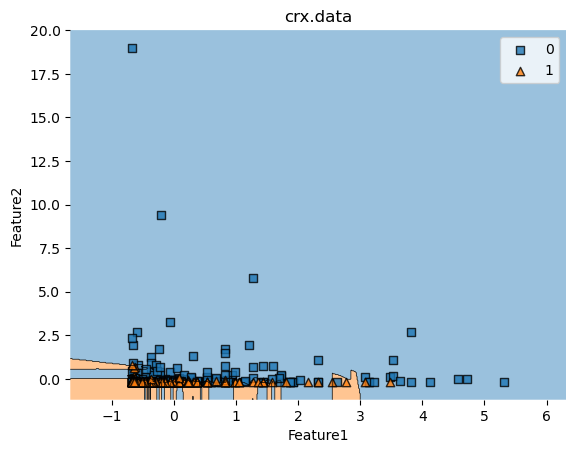

In [22]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.astype(int).values, clf=clf1)
plt.title(name)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

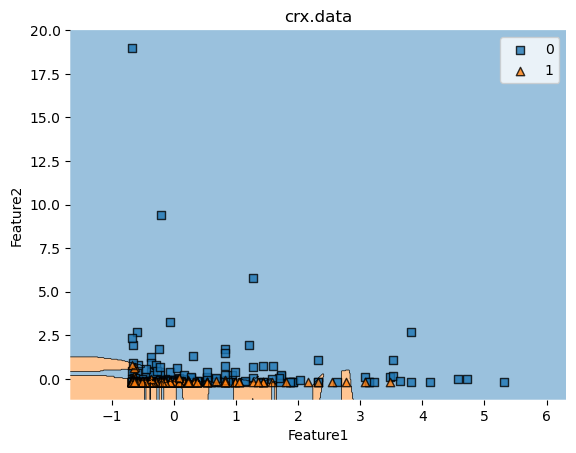

In [23]:
plot_decision_regions(X_train, y_train.astype(int).values, clf=clf2)
plt.title(name)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

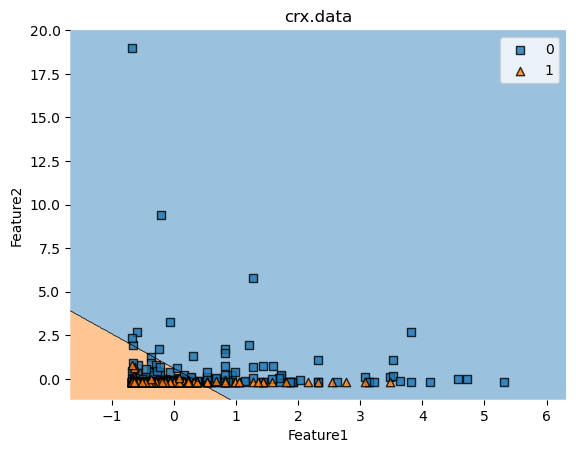

In [24]:
plot_decision_regions(X_train, y_train.astype(int).values, clf=clf3)
plt.title(name)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

9. Визуализируйте на одном рисунке кривые бинарной классификации, указанные в индивидуальном задании, для каждого из классификаторов, подписывая оси и рисунок. Используйте в качестве меток легенды для названия классификаторов.  

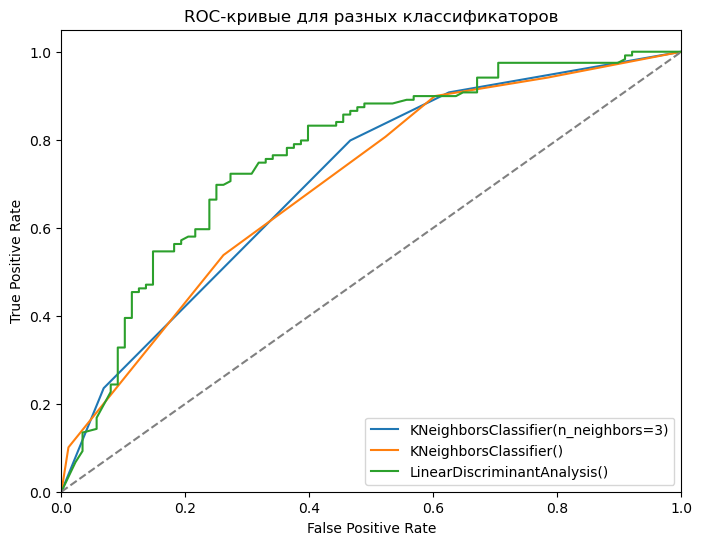

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr_clf1, tpr_clf1, _ = roc_curve(y_test, clf1.predict_proba(X_test)[:, 1])
fpr_clf2, tpr_clf2, _ = roc_curve(y_test, clf2.predict_proba(X_test)[:, 1])
fpr_clf3, tpr_clf3, _ = roc_curve(y_test, clf3.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_clf1, tpr_clf1,label=clf1)
plt.plot(fpr_clf2, tpr_clf2,label=clf2)
plt.plot(fpr_clf3, tpr_clf3,label=clf3)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для разных классификаторов')
plt.legend(loc='lower right')
plt.show()

10. Определите лучший из используемых методов бинарной классификации по показателю площади, ограниченной кривой из п. 9.  

In [26]:
roc_auc_clf1 = auc(fpr_clf1, tpr_clf1)
roc_auc_clf2 = auc(fpr_clf2, tpr_clf2)
roc_auc_clf3 = auc(fpr_clf3, tpr_clf3)

auc_values = [roc_auc_clf1, roc_auc_clf2, roc_auc_clf3]
classifier_names = [clf1,clf2,clf3]

best_classifier_index = np.argmax(auc_values)

best_classifier = classifier_names[best_classifier_index]
best_auc = auc_values[best_classifier_index]

print("Лучший классификатор:", best_classifier)
print("AUC для лучшего классификатора:", best_auc)

Лучший классификатор: LinearDiscriminantAnalysis()
AUC для лучшего классификатора: 0.767379679144385
